# 第2章 識別規則と学習法の概要
## 2.1 識別規則と学習法の分類

識別規則は、入力データ $x$ から、クラス $ C_{i} \in \{ C_{1} ... C_{k} \} $ への写像である。

### 2.1.1 識別規則の構成法
(a)事後確率による方法：パターン空間に確立分布を仮定し、事後確率が最大のクラスに分類する。 _ベイズの最大事後確率法_ 等。

(b)距離による方法：ベクトルの距離が一番近い代表ベクトルのクラスに分類する。_最近傍法_。

(c)関数値による方法： _パーセプトロン型学習回路_ 、 _SVM_ 。

(d)決定木による方法：識別規則の真偽におうじて、次の識別規則を順次適用する。 _決定木_

### 2.1.2 教室付き学習
2クラス問題の線形識別関数の場合

$ y = f(x;w) = w_{1}x_{1} + ... + w_{d}x_{d} = \bf{w}^{T} \bf{x}$

パラメータwとベクトルxの線形関数（内積）で表現される。
学習するためには、入力データとそのクラスを指定したデータを対にした学習データが必要になる。クラスを指定したデータを教師データという。
入力データと教師データの全ての対の集合を学習データセットといい、 $ D_{L} $ で表す。

性能評価を行うために、学習に使用しなかったテストデータセット $ D_{T} $ を使う。

### 2.1.3 教師付き学習と線形回帰
関数近似（回帰）を線形関数で近似する場合、線形回帰と呼ばれる。

### 2.1.4 教師なし学習
クラスタリング等。一部のみ教師をつける方法を*形質導入学習*(transductive learning)と呼ぶ、

## 2.2 汎化能力
未知のデータに対する識別能力を_汎化能力_といい、その誤差を_汎化誤差_という。

## 2.2.1 学習データとテストデータの作り方
100円玉識別の場合。

$ D_{L} $ の硬貨を使って設計し、$ D_{T} $ の硬貨を使ってテストした時の誤り率を $ \epsilon (p_{L}, p_{T}) $ で表す。流通している全ての硬貨を*母集団*といい、そのd次元特徴の分布を$p$で表し*真の分布*とよぶ。$p$と$p_{L}, p_{T}$とのずれを*偏り（バイアス）*と呼ぶ。
学習したデータでテストをした誤り率を*再代入誤り率*(resubstitution error)と呼び、$ \epsilon (p_{L}, p_{L}) $で表す。

データの分割方法。
 
#### ①ホールドアウト法。
データを学習用とテスト用に完全に分ける。
真の誤り率、再代入誤り率、ホールドアウト誤り率の関係。
$ E_{D_{L}} \{ \epsilon (p_{L}, p_{L}) \} \leq  \epsilon (p, p) \leq  E_{D_{T}} \{ \epsilon (p_{L}, p_{T}) \} $

#### ②交差確認法(cross validation法)
学習データをm個のグループに分け、どれか一つのデータで学習を行い、残りの一個でテストを行う。これをすべてのiで行って平均を取る。
識別の予測値は
$ \epsilon = \frac {1} {m} \sum_{i=1}^{m} \epsilon _{-i} $
となる。

#### ③ひとつ抜き法(leave-one-out)
ジャックナイフ法とも呼ぶ。②を選んだ一つ以外の全てを学習に使う。

#### ④ブートストラップ法

https://www39.atwiki.jp/stat_semi/pages/26.html





## 2.2.2 汎化能力の評価法とモデル選択
モデル選択：パラメータの数を変え、テストデータに対する誤り率がもっとも小さくなるパラメータを選択する方法


$f(x) = 0.5 + 0.4*sin(2 \pi x) + \epsilon = h(x) + \epsilon$

基準となる曲線

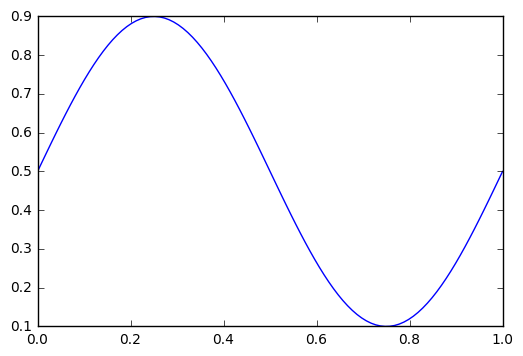

In [15]:
%matplotlib inline
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import math

x = np.linspace(0, 1, 100)
y  = 0.5 + 0.4 * np.sin(2 * x * math.pi)
plt.plot(x, y)

等間隔に11個を選び、平均0, 分散0.05の正規分布ノイズを加える。


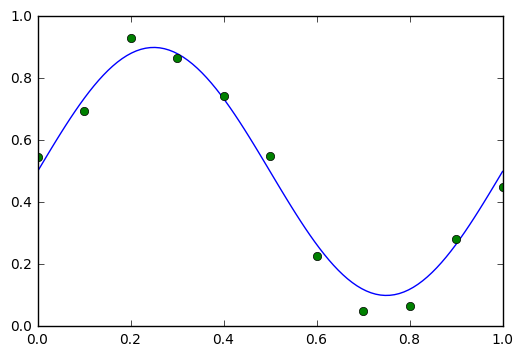

In [18]:
plot_num = 11
x2 = np.linspace(0, 1, plot_num)
y2  = 0.5 + 0.4 * np.sin(2 * x2 * math.pi) + normal(0,0.05, plot_num) # 平均0, 分散0.05の正規分布を加える 

plt.plot(x, y)
plt.plot(x2, y2, 'o')

p次多項式による近似曲線を 

$y(x: {\bf a} ) = a_{0} + a_{1}x + a_{2} x^{2} +  \cdots + a_{p}x^{p}, {\bf a} = (a_{0}, a_{1}, \cdots, a_{p})^{T} $

とする。近似曲線を学習セット $D$ を使って $y(x;D)$で表すと、元の波形$h(x)$との近似の良さは、最小二乗誤差(MSE)で評価できる。

$ MSE = \int (y (x;D) -h(x))^{2} p (x) dx = E \{ (y(x;D)) - h(x))^{2} \} $

複数のデータセットで誤差を評価し、期待値を取る操作を

$ MSE_{D} = E_{D} \{ (y(x;D)) - h(x))^{2} \} $

と表す。

[多項式の近似](三角関数の多項式近似.ipynb)

